In [197]:
import pandas as pd

empresa['Churn_bin'] = empresa['Churn'].map({'No':0,'Yes':1})

---



In [198]:
empresa = pd.read_csv('/content/empresa_limpia.csv')

In [199]:
empresa

,customerID,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,Dependents,tenure,Cuentas_Diarias,Churn_bin
0,0002-ORFBO,No,Yes,No,DSL,No,Yes,No,Yes,Yes,...,Mailed check,65.60,593.30,Female,0,Yes,Yes,9,2.186667,0.0
1,0003-MKNFE,No,Yes,Yes,DSL,No,No,No,No,No,...,Mailed check,59.90,542.40,Male,0,No,No,9,1.996667,0.0
2,0004-TLHLJ,Yes,Yes,No,Fiber optic,No,No,Yes,No,No,...,Electronic check,73.90,280.85,Male,0,No,No,4,2.463333,1.0
3,0011-IGKFF,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,...,Electronic check,98.00,1237.85,Male,1,Yes,No,13,3.266667,1.0
4,0013-EXCHZ,Yes,Yes,No,Fiber optic,No,No,No,Yes,Yes,...,Mailed check,83.90,267.40,Female,1,Yes,No,3,2.796667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Yes,No,DSL,Yes,No,No,Yes,No,...,Mailed check,55.15,742.90,Female,0,No,No,13,1.838333,0.0
7263,9992-RRAMN,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,...,Electronic check,85.10,1873.70,Male,0,Yes,No,22,2.836667,1.0
7264,9992-UJOEL,No,Yes,No,DSL,No,Yes,No,No,No,...,Mailed check,50.30,92.75,Male,0,No,No,2,1.676667,0.0
7265,9993-LHIEB,No,Yes,No,DSL,Yes,No,Yes,Yes,No,...,Mailed check,67.85,4627.65,Male,0,Yes,Yes,67,2.261667,0.0


# ELIMINACION DE COLUMNAS INNECESARIAS

In [200]:
empresa = empresa.drop(columns=['customerID'])
empresa = empresa.drop(columns=['Churn'])

In [201]:
empresa

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,Dependents,tenure,Cuentas_Diarias,Churn_bin
0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,...,Mailed check,65.60,593.30,Female,0,Yes,Yes,9,2.186667,0.0
1,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,...,Mailed check,59.90,542.40,Male,0,No,No,9,1.996667,0.0
2,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,...,Electronic check,73.90,280.85,Male,0,No,No,4,2.463333,1.0
3,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,...,Electronic check,98.00,1237.85,Male,1,Yes,No,13,3.266667,1.0
4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,...,Mailed check,83.90,267.40,Female,1,Yes,No,3,2.796667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,...,Mailed check,55.15,742.90,Female,0,No,No,13,1.838333,0.0
7263,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,...,Electronic check,85.10,1873.70,Male,0,Yes,No,22,2.836667,1.0
7264,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,...,Mailed check,50.30,92.75,Male,0,No,No,2,1.676667,0.0
7265,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,...,Mailed check,67.85,4627.65,Male,0,Yes,Yes,67,2.261667,0.0


# Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.



In [202]:
import numpy as np
empresa['Churn_bin'] = empresa['Churn_bin'].replace([np.inf, -np.inf], np.nan)
empresa['Churn_bin'] = empresa['Churn_bin'].fillna(empresa['Churn_bin'].mode()[0])


In [203]:
X = empresa.drop('Churn_bin', axis=1)
y = empresa['Churn_bin']

In [204]:
X

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,Dependents,tenure,Cuentas_Diarias
0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,Female,0,Yes,Yes,9,2.186667
1,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,Male,0,No,No,9,1.996667
2,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Male,0,No,No,4,2.463333
3,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Male,1,Yes,No,13,3.266667
4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Female,1,Yes,No,3,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,Female,0,No,No,13,1.838333
7263,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Male,0,Yes,No,22,2.836667
7264,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,Male,0,No,No,2,1.676667
7265,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,Male,0,Yes,Yes,67,2.261667


In [205]:
y.astype(int)

,Churn_bin
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [206]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [207]:

columnas = X.columns

In [208]:
cat_cols = [
'PhoneService','MultipleLines','InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
'gender','Partner','Dependents'
]

In [209]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
   cat_cols),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [210]:
X_transformado = one_hot.fit_transform(X)

X_transformado = pd.DataFrame(
    X_transformado,
    columns=one_hot.get_feature_names_out()
)

X_transformado.head(20)

,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,remainder__Charges.Monthly,remainder__Charges.Total,remainder__SeniorCitizen,remainder__tenure,remainder__Cuentas_Diarias
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,65.60,593.30,0.0,9.0,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,59.90,542.40,0.0,9.0,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,73.90,280.85,0.0,4.0,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,98.00,1237.85,1.0,13.0,3.266667
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,83.90,267.40,1.0,3.0,2.796667
5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,69.40,571.45,0.0,9.0,2.313333
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,109.70,7904.25,1.0,71.0,3.656667
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,84.65,5377.80,0.0,63.0,2.821667
8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,48.20,340.35,1.0,7.0,1.606667
9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,90.45,5957.90,0.0,65.0,3.015000


# Verificación de la Proporción de Cancelación (Churn)


Verificación de la Proporción de Cancelación (Churn)
Verificación de la Proporción de Cancelación (Churn)
Descripción
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.


In [211]:
(y.value_counts(normalize=True) * 100).round(2)

,proportion
Churn_bin,
0.0,74.28
1.0,25.72


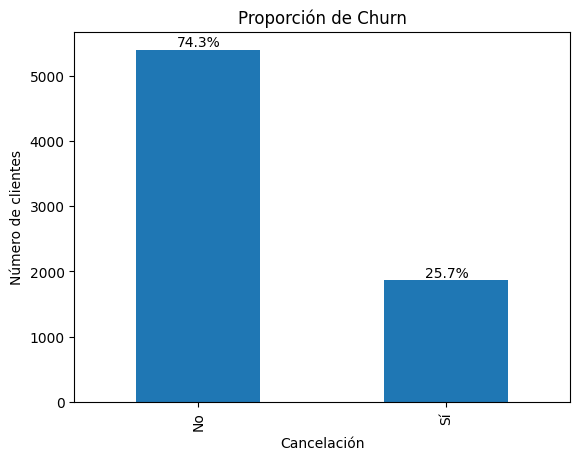

In [212]:
import matplotlib.pyplot as plt
conteo = y.value_counts()
ax = conteo.rename(index={0:'No', 1:'Sí'}).plot(kind='bar')
total = len(y)

for i, v in enumerate(conteo):
    porcentaje = (v / total) * 100
    ax.text(i, v, f'{porcentaje:.1f}%', ha='center', va='bottom')

plt.xlabel("Cancelación")
plt.ylabel("Número de clientes")
plt.title("Proporción de Churn")

plt.show()

In [213]:
X = pd.get_dummies(X, drop_first=True)

In [214]:
X[X.select_dtypes(include='bool').columns] = \
    X.select_dtypes(include='bool').astype(int)

# separacion de datos

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)



balanceo de clases

In [216]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar que las clases están balanceadas
print("Distribución antes del oversampling:")
print(y_train.value_counts())
print("\nDistribución después del oversampling:")
print(y_train_res.value_counts())

Distribución antes del oversampling:
Churn_bin
0.0    4048
1.0    1402
Name: count, dtype: int64

Distribución después del oversampling:
Churn_bin
0.0    4048
1.0    4048
Name: count, dtype: int64


# Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.



In [217]:

from sklearn.preprocessing import MinMaxScaler


In [218]:

normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train_res)

In [219]:

pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.658865,0.661702,0.0,0.944444,0.658865,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.222610,0.172082,0.0,0.541667,0.222610,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.559263,0.103255,0.0,0.180556,0.559263,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.760956,0.305033,0.0,0.402778,0.760956,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.569223,0.061377,1.0,0.097222,0.569223,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,0.532746,0.132265,0.0,0.222222,0.532746,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8092,0.557960,0.008552,1.0,0.013889,0.557960,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8093,0.808967,0.433086,0.0,0.513889,0.808967,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8094,0.799774,0.339786,1.0,0.402778,0.799774,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


CORRELACION Y SELECCION DE VARIABLES

CORRELACION

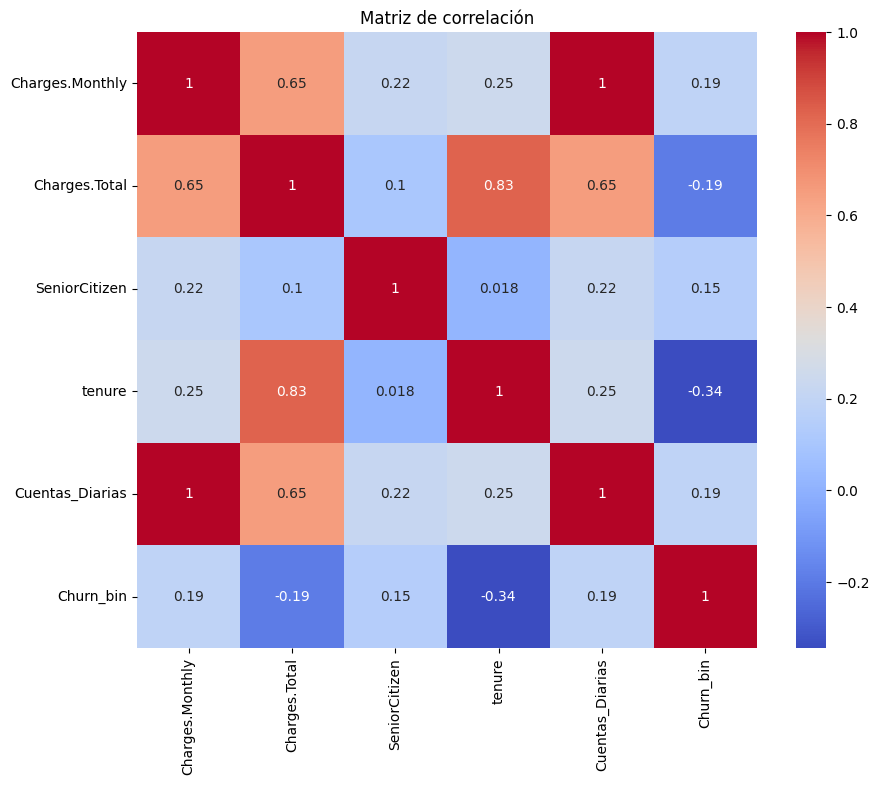

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo variables numéricas
df_numerico = empresa.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
correlacion = df_numerico.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [221]:
correlacion["Churn_bin"].sort_values(ascending=False)

,Churn_bin
Churn_bin,1.000000
Charges.Monthly,0.189866
Cuentas_Diarias,0.189866
SeniorCitizen,0.146733
Charges.Total,-0.193345
tenure,-0.344079


El análisis de correlación permitió identificar que la variable tenure presenta una correlación negativa con la cancelación, lo que indica que los clientes con mayor antigüedad tienen menor probabilidad de abandonar el servicio. Por otro lado, Charges.Monthly mostró una correlación positiva moderada, sugiriendo que cargos mensuales elevados podrían estar asociados a una mayor probabilidad de churn.

ANALISIS DIRIGIDO

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

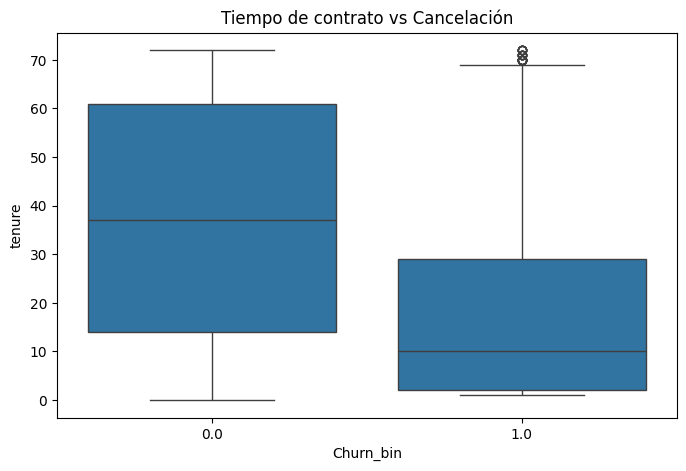

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn_bin", y="tenure", data=empresa)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()

+ A menor antigüedad, mayor probabilidad de churn.


+ Los clientes nuevos son los más propensos a cancelar.

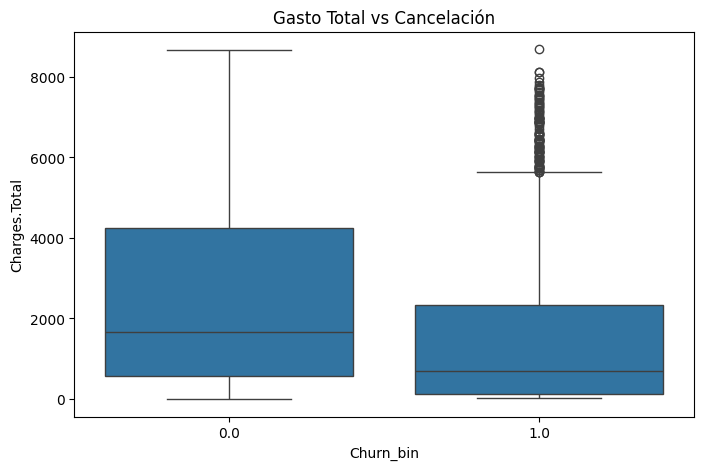

In [223]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn_bin", y="Charges.Total", data=empresa)
plt.title("Gasto Total vs Cancelación")
plt.show()

Existe una relación negativa clara entre el gasto total acumulado y la cancelación.

👉 Clientes con menor gasto total tienden a cancelar más.
👉 Clientes con mayor gasto acumulado tienden a permanecer.

🔥 Conclusión combinada de ambos gráficos

Los clientes con:

Menor tiempo de contrato

Menor gasto acumulado

tienen mayor probabilidad de cancelación.

Eso es un patrón muy fuerte y muy típico en modelos de churn.

# Creación de Modelos

# modelo de muestra dummy

In [224]:

from sklearn.dummy import DummyClassifier

In [225]:

dummy = DummyClassifier()
dummy.fit(X_train_res, y_train_res)

dummy.score(X_test, y_test)

0.7429829389102917

**SIGNIFICA QUE EL 74 DE LAS VECES CLASIFICO CORRETAMENTE**

MODELO DE ARBOL

In [226]:

from sklearn.tree import DecisionTreeClassifier

In [227]:


modelo_arbol = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=5)
modelo_arbol.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=5)

In [228]:

modelo_arbol.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [229]:

modelo_arbol.score(X_test, y_test)

0.7534397358282884

In [230]:

modelo_arbol.score(X_train_res, y_train_res)


0.813858695652174

In [231]:

modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train_res, y_train_res)


DecisionTreeClassifier(max_depth=3, random_state=5)

In [232]:

modelo_arbol.score(X_train_res, y_train_res)


0.7790266798418972

In [233]:

modelo_arbol.score(X_test, y_test)

0.6857457347275729

ALGOTITMO KNN

In [234]:

from sklearn.neighbors import KNeighborsClassifier

In [235]:

knn = KNeighborsClassifier()

In [236]:

knn.fit(X_train_normalizado, y_train_res)

KNeighborsClassifier()

In [237]:

X_test_normalizado = normalizacion.transform(X_test)


In [238]:

knn.score(X_test_normalizado, y_test)

0.724821133736929

nuevo modelo

In [239]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split



baseline = DummyRegressor()
baseline.fit(X_train_res,y_train_res)

DummyRegressor()

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_train_res, y_train_res)

# Predicción y reporte
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1350
         1.0       0.58      0.55      0.56       467

    accuracy                           0.78      1817
   macro avg       0.71      0.71      0.71      1817
weighted avg       0.78      0.78      0.78      1817



# Evaluación de los Modelos

In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# -------------------- Dummy Classifier --------------------
y_pred_dummy = dummy.predict(X_test)
print("----- DUMMY CLASSIFIER -----")
print("Exactitud:", accuracy_score(y_test, y_pred_dummy))
print("Precisión:", precision_score(y_test, y_pred_dummy, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_dummy, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_dummy, zero_division=0))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_dummy))
print("\n")

# -------------------- Árbol de Decisión --------------------
y_pred_arbol = modelo_arbol.predict(X_test)
print("----- ÁRBOL DE DECISIÓN -----")
print("Exactitud:", accuracy_score(y_test, y_pred_arbol))
print("Precisión:", precision_score(y_test, y_pred_arbol, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_arbol, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_arbol, zero_division=0))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_arbol))
print("\n")

# -------------------- KNN --------------------
# Asegúrate que X_test_normalizado tenga el mismo número de filas que y_test
X_test_normalizado = normalizacion.transform(X_test)
y_pred_knn = knn.predict(X_test_normalizado)

print("----- KNN -----")
print("Exactitud:", accuracy_score(y_test, y_pred_knn))
print("Precisión:", precision_score(y_test, y_pred_knn, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_knn, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_knn, zero_division=0))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("\n")

# -------------------- Random Forest --------------------
y_pred_rf = rf.predict(X_test)
print("----- RANDOM FOREST -----")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_rf, zero_division=0))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")

----- DUMMY CLASSIFIER -----
Exactitud: 0.7429829389102917
Precisión: 0.0
Recall: 0.0
F1-score: 0.0
Matriz de confusión:
 [[1350    0]
 [ 467    0]]


----- ÁRBOL DE DECISIÓN -----
Exactitud: 0.6857457347275729
Precisión: 0.43643031784841074
Recall: 0.7644539614561028
F1-score: 0.5556420233463035
Matriz de confusión:
 [[889 461]
 [110 357]]


----- KNN -----
Exactitud: 0.724821133736929
Precisión: 0.472636815920398
Recall: 0.6102783725910065
F1-score: 0.5327102803738317
Matriz de confusión:
 [[1032  318]
 [ 182  285]]


----- RANDOM FOREST -----
Exactitud: 0.782608695652174
Precisión: 0.5818181818181818
Recall: 0.5481798715203426
F1-score: 0.5644983461962514
Matriz de confusión:
 [[1166  184]
 [ 211  256]]




Análisis de la Importancia de las Variables

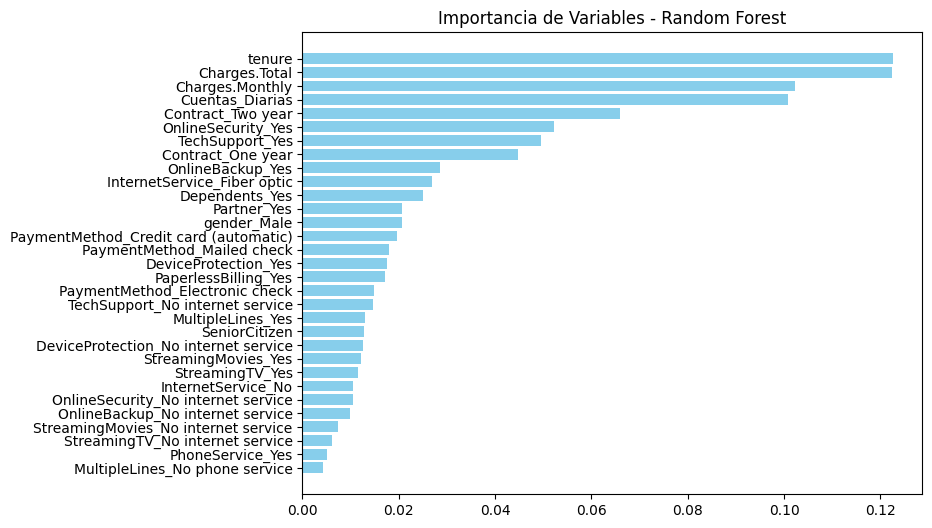

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Importancia Random Forest
importancia_rf = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(importancia_rf['Variable'], importancia_rf['Importancia'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - Random Forest")
plt.show()

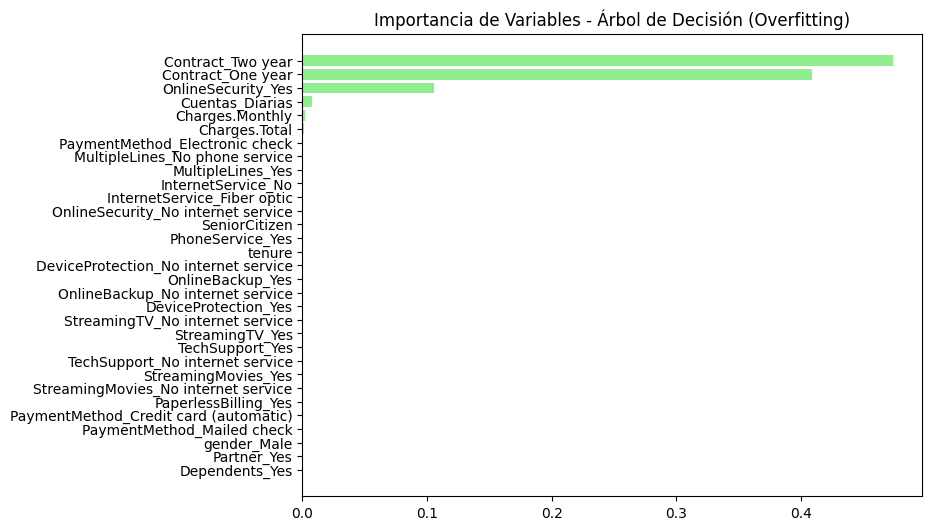

In [243]:
# Importancia Árbol de Decisión
importancia_arbol = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(importancia_arbol['Variable'], importancia_arbol['Importancia'], color='lightgreen')
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - Árbol de Decisión (Overfitting)")
plt.show()

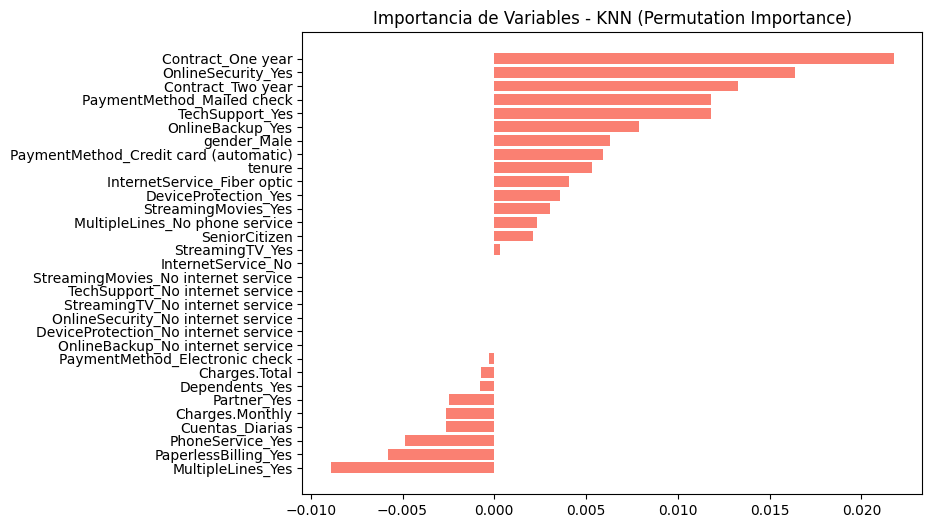

In [244]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.inspection import permutation_importance

X_test_norm_df = pd.DataFrame(X_test_normalizado, columns=X_test.columns)
perm_importance_knn = permutation_importance(knn, X_test_norm_df, y_test, n_repeats=10, random_state=0)

importancia_knn = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': perm_importance_knn.importances_mean
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(importancia_knn['Variable'], importancia_knn['Importancia'], color='salmon')
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - KNN (Permutation Importance)")
plt.show()



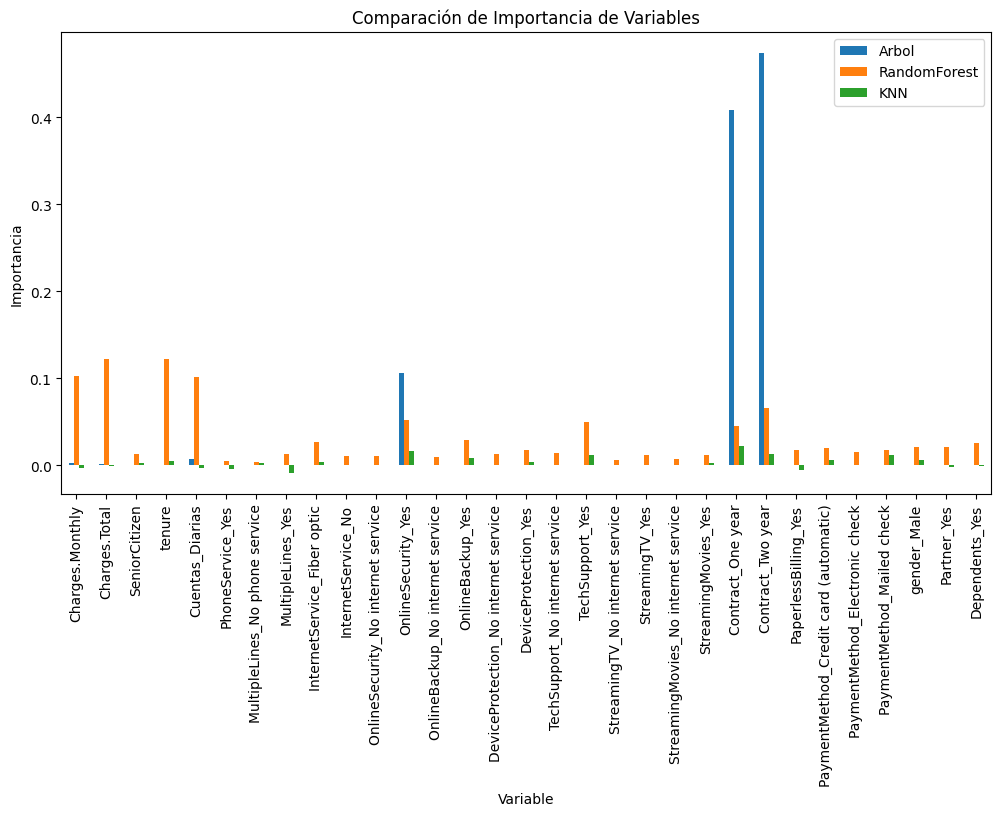

In [245]:
comparacion = pd.DataFrame({
    'Variable': X_test.columns,
    'Arbol': modelo_arbol.feature_importances_,
    'RandomForest': rf.feature_importances_,
    'KNN': perm_importance_knn.importances_mean
})

comparacion.plot(x='Variable', kind='bar', figsize=(12,6))
plt.title("Comparación de Importancia de Variables")
plt.ylabel("Importancia")
plt.show()

# Informe de Factores que Influyen en la Cancelación de Clientes


1.** Rendimiento de los Modelos**

Se evaluaron cuatro modelos para predecir la cancelación de clientes: Dummy Classifier, Árbol de Decisión, KNN y Random Forest. Las métricas de rendimiento fueron exactitud (accuracy), precisión, recall, F1-score y matriz de confusión.

| Modelo             | Exactitud (%) | Precisión | Recall | F1-score | Observaciones                                                                 |
|-------------------|---------------|-----------|--------|----------|-------------------------------------------------------------------------------|
| Dummy Classifier   | 74.30         | 0.0       | 0.0    | 0.0      | Clasificación por mayoría; no identifica correctamente los clientes que cancelan. |
| Árbol de Decisión  | 68.57         | 0.44      | 0.76   | 0.56     | Buen recall, pero precisión baja; evidencia overfitting al entrenar con profundidad mayor. |
| KNN                | 72.48         | 0.47      | 0.61   | 0.53     | Mejor equilibrio entre precisión y recall, pero aún limitado en identificar cancelaciones. |
| Random Forest      | 78.26         | 0.58      | 0.55   | 0.56     | Mejor desempeño global; balance adecuado entre detectar cancelaciones y evitar falsos positivos. |
Conclusión sobre los modelos:

Random Forest es el modelo más confiable para predecir la cancelación, ya que combina precisión y recall de manera equilibrada y mejora sobre Árbol de Decisión y KNN. El Dummy Classifier solo sirve como baseline.

2. **Importancia de Variables**

Se analizaron las variables más influyentes utilizando la importancia de características de Random Forest, Árbol de Decisión y KNN (permutation importance).

Variables con mayor influencia según Random Forest:

* tenure (tiempo con la compañía) – Los clientes recientes tienen mayor

probabilidad de cancelar.

+ Charges.Monthly (costo mensual) – Tarifas más altas aumentan la probabilidad de cancelación.

+ InternetService_Fiber optic – Clientes con servicio de fibra tienen más riesgo de cancelación si no perciben valor.

+ Contract (tipo de contrato) – Contratos de mes a mes muestran más cancelaciones que contratos a largo plazo.

+ TechSupport – Ausencia de soporte técnico aumenta la cancelación.

Variables recurrentes en otros modelos:

+ Partner y Dependents: Los clientes con familia tienden a mantener sus contratos más tiempo.

+ OnlineSecurity y OnlineBackup: La disponibilidad de servicios adicionales reduce la cancelación.

+ PhoneService y MultipleLines: Influencia moderada; depende del uso real de servicios.

La comparación entre modelos mostró consistencia: tenure, costo mensual y tipo de contrato son factores clave en todas las metodologías.

3. **Estrategias de Retención de Clientes**

Basadas en los factores identificados, se proponen las siguientes acciones:

Ofertas de fidelización para clientes nuevos:

Descuentos o promociones durante los primeros 3–6 meses.

Paquetes combinados para reducir la percepción de alto costo.

Mejorar soporte técnico y servicios adicionales:

Implementar recordatorios de uso de soporte técnico.

Ofrecer opciones de seguridad y respaldo que añadan valor tangible.

Incentivar contratos a largo plazo:

Beneficios por contratos anuales frente a mes a mes.

Bonificaciones por renovación temprana.

Segmentación de clientes de riesgo:

Utilizar Random Forest para predecir clientes con alta probabilidad de cancelar.

Contacto proactivo vía email, llamadas o promociones personalizadas.

Optimización de precios y paquetes:

Ajustar precios para evitar que clientes con menor capacidad de pago cancelen.

Crear planes flexibles y escalables.

4. **Conclusión**

Random Forest es el modelo más adecuado para identificar clientes propensos a cancelar.

Factores principales de cancelación: tiempo de contrato, costo mensual, tipo de contrato y ausencia de soporte técnico.

Estrategias de retención deben centrarse en fidelización temprana, soporte mejorado, incentivos de contrato y predicción proactiva de clientes de riesgo.

Aplicando estas estrategias basadas en datos, se puede reducir significativamente la tasa de cancelación y aumentar la satisfacción y lealtad del cliente.